¡Hola,Israel!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Israel! Has hecho un excelente trabajo, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

### Carga de librerías y dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [3]:
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

### Preparar los datos

In [4]:
print(df.columns)
columns_new = {}
for col in df.columns:
    col_final_name = col.lower()
    columns_new[col] = col_final_name

df.rename(columns=columns_new, inplace=True)
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
critic_score_mean = np.round(df['critic_score'].mean(),2)
df['critic_score'] = df['critic_score'].fillna(critic_score_mean)
user_score_mean = np.round(df['user_score'].mean(),2)
df['user_score'] = df['user_score'].fillna(user_score_mean)
df['rating'] = df['rating'].fillna('')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


*Decidí eliminar los registros que no tenían asignado un año de lanzamiento ya que son muy pocos en comparación con el número total de registros y má adelante necesitaré esta columna para analizar la información por periodos*

*Se agrego el valor de la media para los valores ausentes de las columnas critic_score y user_score. Se reemplazaron los valores asusentes de la columna rating por string vacíos*

*Se hizo cambio de datos de la columna "year_of_release" (float to int) y de la columna user_score (object to float)*

In [6]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.99,7.13,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.99,7.13,,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 


*Se agrego una columna adicional "total_sales" sumando las ventas registradas en las columnas de ventas.*

### Análisis de los datos

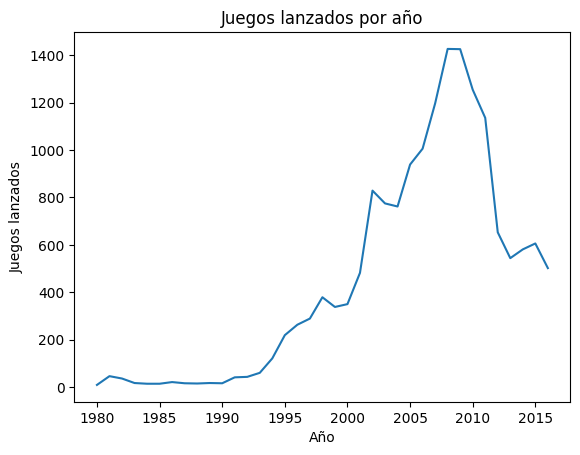

In [7]:
df_games_by_year = df.groupby(by='year_of_release')['name'].count()
df_games_by_year.plot(title='Juegos lanzados por año',
                     ylabel='Juegos lanzados',
                     xlabel='Año')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



*Se puede apreciar que entre el año 2007 y 2009 fueron los años dónde hubo más lanzamientos de juegos. Del año 1990 hasta el 2009 la cantidad de juegos lanzados tendía a incrementar*

In [8]:
#Agrupar por plataforma y año de lanzamiento para el primer vistazo
df_platform_year_group = df.groupby(by=['platform', 'year_of_release'])['total_sales'].sum().reset_index()
print(df_platform_year_group.head(25))

   platform  year_of_release  total_sales
0      2600             1980        11.38
1      2600             1981        35.68
2      2600             1982        28.88
3      2600             1983         5.84
4      2600             1984         0.27
5      2600             1985         0.45
6      2600             1986         0.67
7      2600             1987         1.94
8      2600             1988         0.74
9      2600             1989         0.63
10      3DO             1994         0.02
11      3DO             1995         0.08
12      3DS             2011        63.20
13      3DS             2012        51.36
14      3DS             2013        56.57
15      3DS             2014        43.76
16      3DS             2015        27.78
17      3DS             2016        15.14
18       DC             1998         3.38
19       DC             1999         5.16
20       DC             2000         5.99
21       DC             2001         1.07
22       DC             2002      

In [9]:
#Agrupar datos por plataforma y calcular ventas totales
total_sales_by_platform = df.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
#Guardar en una lista las plataformas top
top_platforms = total_sales_by_platform.head(5).index.tolist()

print("Top plataformas con mayores ventas totales:")
print(total_sales_by_platform.head(5))

Top plataformas con mayores ventas totales:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64


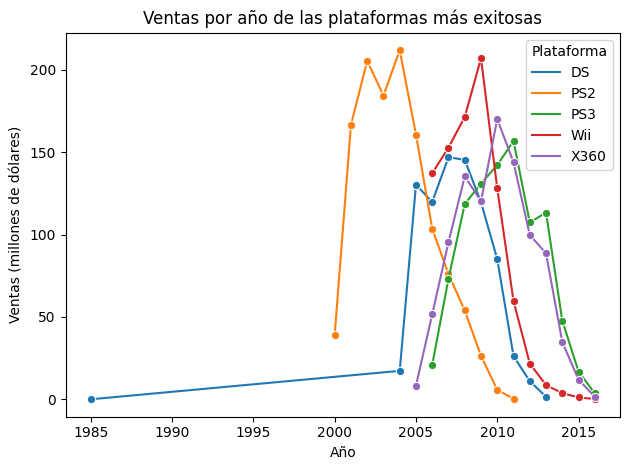

In [10]:
# Filtrar datos para traer agrupado solo de plataformas top
sales_top = df_platform_year_group[df_platform_year_group["platform"].isin(top_platforms)]
# Gráfico de líneas
#No encontré una manera de cambiar el color de las líneas con matplotlib pero
#encontré una manera de ajustarlo con sns y combinar ambas librerías
plt.figure()
sns.lineplot(data=sales_top, x="year_of_release", y="total_sales", hue="platform", marker="o")
plt.title("Ventas por año de las plataformas más exitosas")
plt.xlabel("Año")
plt.ylabel("Ventas (millones de dólares)")
plt.legend(title="Plataforma")
plt.tight_layout()
plt.show()

Plataformas desaparecidas antes de 2015:
   platform  start_activity  end_activity  live_duration
4        DS            1985          2013             28
16      PS2            2000          2011             11
29       XB            2000          2008              8
3        DC            1998          2008             10
6       GBA            2000          2007              7
7        GC            2001          2007              6
15       PS            1994          2003              9
10      N64            1996          2002              6
5        GB            1988          2001             13
25       WS            1999          2001              2
23     SNES            1990          1999              9
21      SAT            1994          1999              5
12       NG            1993          1996              3
14     PCFX            1996          1996              0
24     TG16            1995          1995              0
1       3DO            1994          1995      

<AxesSubplot:xlabel='live_duration'>

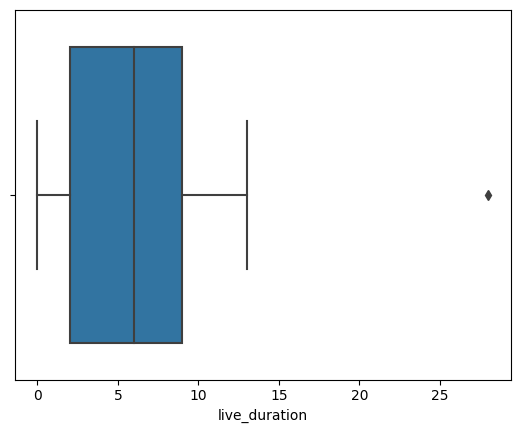

In [11]:
# Obtner año de inicio y fin de actividad por cada plataforma
activity_platforms = df_platform_year_group.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
activity_platforms.columns = ['platform', 'start_activity', 'end_activity']
activity_platforms['live_duration'] = activity_platforms['end_activity'] - activity_platforms['start_activity']

# Plataformas que no tienen ventas después de 2015
platforms_inactivity = activity_platforms[activity_platforms["end_activity"] < 2015]

print("Plataformas desaparecidas antes de 2015:")
print(platforms_inactivity.sort_values(by='end_activity', ascending=False))

print("Estadísticas sobre la duración de las plataformas:")
print(platforms_inactivity["live_duration"].describe())

sns.boxplot(platforms_inactivity["live_duration"])

*Las plataformas más exitosas en ventas son: PS2, X360, PS3, Wii y DS*

*La mayoría de las plataformas tienen un periodo de duración de entre 0 y 13 años*

*Algunas plataformas como PCFX, TG16 y GG desaparecieron rápidamente.*

*El ciclo promedio de vida de una plataforma es de casi 7 años*

*-Consideraré datos solo del año 2010 ya que considero que me pueden dar una buena muestra de información para lo que se necesita (no tiene datos atipicos y la distribución de datos se ve más equlibrada), me base en los datos arrojados en la visualización de líneas de las plataformas top.*

In [12]:
df_recent_data = df.query("year_of_release == 2010")
df_recent_top_platforms = df_recent_data.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
df_recent_top_platforms

,platform,total_sales
0,X360,170.03
1,PS3,142.17
2,Wii,127.95
3,DS,85.02
4,PSP,35.04
5,PC,24.28
6,PS2,5.64


count      7.000000
mean      84.304286
std       64.317901
min        5.640000
25%       29.660000
50%       85.020000
75%      135.060000
max      170.030000
Name: total_sales, dtype: float64

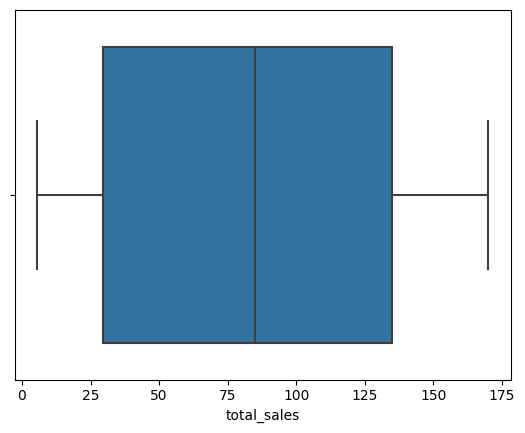

In [13]:
sns.boxplot(df_recent_top_platforms['total_sales'])
df_recent_top_platforms['total_sales'].describe()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>
<br>
    Vale, lo tendré en cuenta, igual para esta sección decidí usar los datos del año 2010 porque fue el año en el que no encontré datos atípicos, podrías decirme si esta también es una buena elección?
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, si es una buena elección. De esta manera podemos identificar resultados que no tengan el sesgo de los valores atípicos

*Las plataformas más rentables parecen ser X360, PS3 y Wii*

*A pesar de que las plataformas PSP, PC	y PS2 también entran en el top, presentan una gran diferencia del top 4 de las plataformas líderes en ventas para el año analizado*

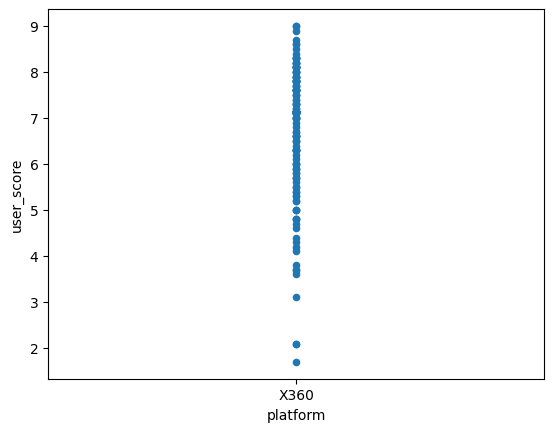

Coeficiente de correlación Ventas / critica de usuario
0.07263479706910927



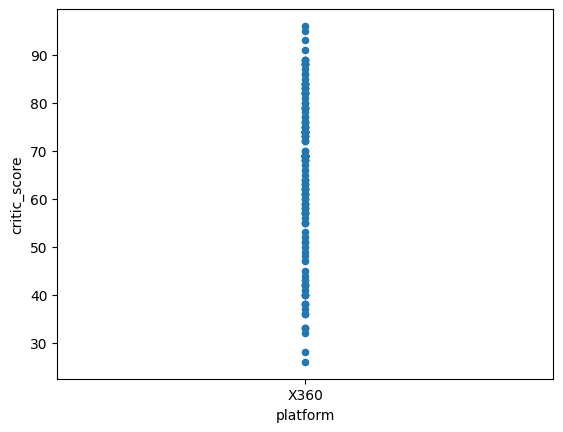

Coeficiente de correlación Ventas / critica de profesional
0.25601989975026684


In [14]:
df_x360 = df_recent_data.query("platform == 'X360'")
df_x360.plot(x='platform',
            y='user_score',
            kind='scatter')
plt.show()
print('Coeficiente de correlación Ventas / critica de usuario')
print(df_x360['total_sales'].corr(df_x360['user_score']))
print()
df_x360 = df_recent_data.query("platform == 'X360'")
df_x360.plot(x='platform',
            y='critic_score',
            kind='scatter')
plt.show()
print('Coeficiente de correlación Ventas / critica de profesional')
print(df_x360['total_sales'].corr(df_x360['critic_score']))

*El resultado del cálculo de la correlación indica que las criticas de los profesionales influyen de una manera má fuerte en las ventas de los juegos que las criticas de los usuarios.*

In [15]:
#Se evaluaran los juegos solo de las plataformas X360, Wii, PSP, PS2 y PS3
platforms = ['X360', 'Wii', 'PSP', 'PS2', 'PS3']
df_filtered_data = df_recent_data.query("platform in @platforms")
df_games_grouped = df_filtered_data.groupby(by=['name', 'platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()
print(df_games_grouped.head(30))

                               name platform  total_sales
0                Kinect Adventures!     X360        21.82
1           Call of Duty: Black Ops     X360        14.62
2           Call of Duty: Black Ops      PS3        12.63
3                    Gran Turismo 5      PS3        10.70
4                       Halo: Reach     X360         9.86
5                      Just Dance 2      Wii         9.44
6                         Wii Party      Wii         8.38
7              Super Mario Galaxy 2      Wii         7.51
8                     Zumba Fitness      Wii         6.70
9               Red Dead Redemption      PS3         6.48
10      Donkey Kong Country Returns      Wii         6.45
11              Red Dead Redemption     X360         6.32
12                    Kinect Sports     X360         6.19
13                        Fable III     X360         5.10
14                   FIFA Soccer 11      PS3         5.07
15         Monster Hunter Freedom 3      PSP         4.87
16            

*La ventas del mismo juego pero en diferente plataforma si presentan alguna diferencia en ventas, como el caso de "Call of Duty: Black Ops", "Red Dead Redemption" o "Assassin's Creed: Brotherhood" mostrados en la tabla anterior.*

In [16]:
df_top_genre = df_recent_data.groupby(by='genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
df_top_genre

,genre,total_sales
0,Action,115.29
1,Misc,95.14
2,Sports,91.24
3,Shooter,76.83
4,Role-Playing,69.65
5,Racing,34.37
6,Platform,31.04
7,Simulation,21.49
8,Adventure,15.96
9,Fighting,14.69


*De acuerdo con los resultados arrojados en la hipótesis de más delante, podemos decir que los géneros de Acción y Deportes son parte de los generos top del año evaluado, ya que siguen estando al menos en el top 3 de ventas.*

### Crear perfil de usuario para cada región

In [17]:
df_top_platform_na_sales = df_recent_data.groupby(by='platform')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
print(df_top_platform_na_sales)
print('------------------')
df_top_platform_eu_sales = df_recent_data.groupby(by='platform')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
print(df_top_platform_eu_sales)
print('------------------')
df_top_platform_jp_sales = df_recent_data.groupby(by='platform')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
print(df_top_platform_jp_sales)
print('------------------')

  platform  na_sales
0     X360    107.38
1      Wii     72.64
2      PS3     60.99
3       DS     40.80
4       PC      9.19
------------------
  platform  eu_sales
0      PS3     50.50
1     X360     46.31
2      Wii     36.31
3       DS     18.82
4       PC     12.12
------------------
  platform  jp_sales
0       DS     19.86
1      PSP     18.16
2      PS3      9.87
3      Wii      8.78
4     X360      2.11
------------------


*Según los resultados obtenidos, las ventas que se realizan en Norteamérica encabezan la lista de las 3 regiones dadas en el dataset.*

In [18]:
df_top_genre_na_sales = df_recent_data.groupby(by='genre')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
print(df_top_genre_na_sales)
print('------------------')
df_top_genre_eu_sales = df_recent_data.groupby(by='genre')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
print(df_top_genre_eu_sales)
print('------------------')
df_top_genre_jp_sales = df_recent_data.groupby(by='genre')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
print(df_top_genre_jp_sales)
print('------------------')

          genre  na_sales
0        Action     59.72
1          Misc     54.11
2        Sports     48.11
3       Shooter     43.04
4  Role-Playing     28.27
------------------
     genre  eu_sales
0   Action     34.51
1   Sports     28.36
2     Misc     26.37
3  Shooter     23.43
4   Racing     14.17
------------------
          genre  jp_sales
0  Role-Playing     23.67
1        Action      8.58
2          Misc      6.69
3        Sports      4.42
4      Platform      3.68
------------------


Los géneros de "Action" y "Sports" están al menos dentro del top 3 en las 3 regiones de las que tenemos información. Esto indica que estos géneros generan buenas ventas.*

In [19]:
# Agrupar datos por rating
sales_rating = df_recent_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean().reset_index()

print("Ventas promedio por rating:")
print(sales_rating)

Ventas promedio por rating:
  rating  na_sales  eu_sales  jp_sales
0         0.070241  0.050066  0.072982
1      E  0.315563  0.173781  0.034969
2   E10+  0.283401  0.144762  0.013537
3     EC  0.177500  0.000000  0.000000
4      M  0.760515  0.430722  0.044433
5      T  0.222944  0.129524  0.037749


*El resultado parece indicar que el valor o clasificación de ESRB tiene un mayor influencia en las ventas realizadas en la región de Noteamérica.*

### Probar hipótesis

In [20]:
df_xbox_user_score = df.query("platform == 'XOne'")
df_pc_user_score = df.query("platform == 'PC'")
alpha = 0.05
results_user_score = st.ttest_ind(df_xbox_user_score['user_score'], df_pc_user_score['user_score'])
print('valor p: ', results_user_score.pvalue)
if results_user_score.pvalue < alpha:
    print("Rechazamos hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  3.0805393656762035e-05
Rechazamos hipótesis nula


*Las calificaciones promedio de las plataformas evaluadas difieren por lo que debemos rechazar una hipótesis nula y dar lugar a una hipótesis alternativa.*

In [35]:
df_action_user_score = df.query("genre == 'Action'")
df_sports_user_score = df.query("genre == 'Sports'")
alpha = 0.05
print(st.levene(df_xbox_user_score['user_score'], df_pc_user_score['user_score']))
valor_p = st.levene(df_xbox_user_score['user_score'], df_pc_user_score['user_score'])[1]
if valor_p < alpha:
    print("Las varianzas son significativamente diferentes")
else:
    print("No hay evidencia suficiente para rechazar la igualdad de varianzas")

LeveneResult(statistic=3.0795672119545534, pvalue=0.07953637655042518)
No hay evidencia suficiente para rechazar la igualdad de varianzas


*El resultado de la prueba de Levene nos indica que las varianzas de ambas poblaciones son similares, esto nos servirá para indicar el valor a asignar en el parametro "equal_var" de la función "st.ttest_ind"*

In [37]:
results_genre_user_score = st.ttest_ind(df_action_user_score['user_score'], df_sports_user_score['user_score'])
print('valor p: ', results_genre_user_score.pvalue)
if results_genre_user_score.pvalue < alpha:
    print("Rechazamos hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.1259309075650335
No podemos rechazar la hipótesis nula


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(df_xbox_user_score['user_score'], df_pc_user_score['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>
    <br>
Hola, me parece interesante la función que propones para poder saber si las varianzas de ambas muestras pueden considerarse iguales o no, en primera instancia omití el paso donde se hace esta comprobación, muchas gracias por ayudarme a corregirlo. Por otro lado, corrígeme si me equivoco pero creo que durante el curso no se abordo esta función, por eso es que no me cruzo por la mente usarla, espero que la manera en la que se agrego en la parte de arriba sea la correcta.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Israel! Es perfecta la forma en la que la agregas, vas a poder seguir explorando esta herramienta en los siguientes proyectos. Sigue disfrutando los siguientes cursos

*Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes indican que no podemos rechazar una hipótesis nula. Ambos géneros son bien recibidos por los usuarios.*

*Para probar ambas hipótesis use el criterio sobre la igualdad de las medias de dos poblaciones ya que tengo los datos requeridos para cada población almacenados en una variable después de haber filtrado seguún los criterios establecidos.*